In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

from sklearn.model_selection import TimeSeriesSplit

import warnings
warnings.filterwarnings("ignore")

import prepare 

## Explore Exercises

Using your store items data you prepped in lesson 2 exercises:

1. Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.

In [2]:
store = prepare.prep_store_data()
store.head()

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total,day_sales_diff
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday,10.92,NaN
2013-01-01 00:00:00+00:00,26.0,295813,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday,30.16,13.0
2013-01-01 00:00:00+00:00,32.0,125995,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,Tuesday,308.48,6.0
2013-01-01 00:00:00+00:00,45.0,314073,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday,197.55,13.0
2013-01-01 00:00:00+00:00,34.0,332333,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday,25.16,-11.0


In [3]:
store.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 17 columns):
sale_amount       913000 non-null float64
sale_id           913000 non-null int64
item_brand        913000 non-null object
item_id           913000 non-null int64
item_name         913000 non-null object
item_price        913000 non-null float64
item_upc12        913000 non-null int64
item_upc14        913000 non-null int64
store_address     913000 non-null object
store_city        913000 non-null object
store_id          913000 non-null int64
store_state       913000 non-null object
store_zipcode     913000 non-null int64
month             913000 non-null int64
day_of_week       913000 non-null object
sales_total       913000 non-null float64
day_sales_diff    912999 non-null float64
dtypes: float64(4), int64(7), object(6)
memory usage: 145.4+ MB


In [4]:
aggregation = 'sum'

train = store[:'2016'].sale_amount.resample('D').agg(aggregation)
test = store['2017':].sale_amount.resample('D').agg(aggregation)

print('Observations: %d' % (len(train.values) + len(test.values)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 1826
Training Observations: 1461
Testing Observations: 365


2. Validate your splits by plotting X_train and y_train.

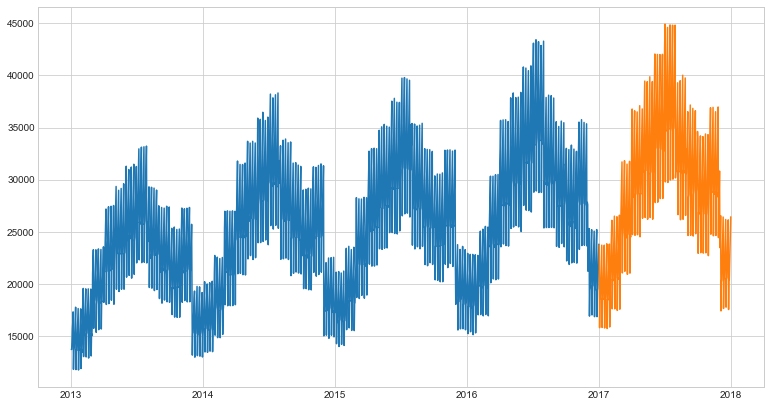

In [31]:
plt.figure(figsize=(13, 7))
plt.plot(train) 
plt.plot(test)
plt.show()

In [6]:
train.head()

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-02 00:00:00+00:00    13678.0
2013-01-03 00:00:00+00:00    14488.0
2013-01-04 00:00:00+00:00    15677.0
2013-01-05 00:00:00+00:00    16237.0
Freq: D, Name: sale_amount, dtype: float64

3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

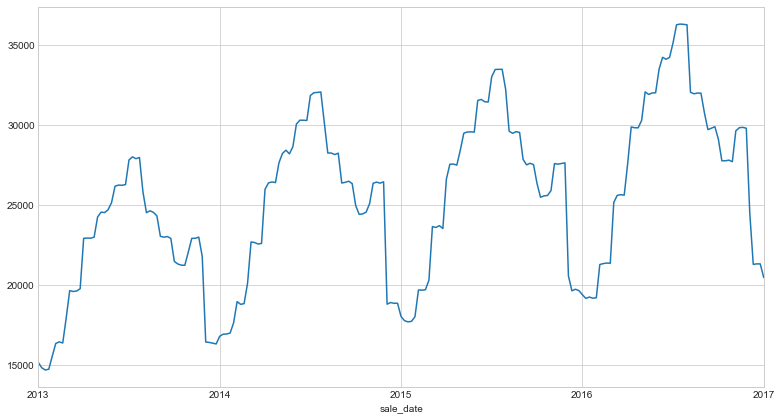

In [35]:
train.resample('W').mean().plot(figsize=(13, 7))
plt.show()

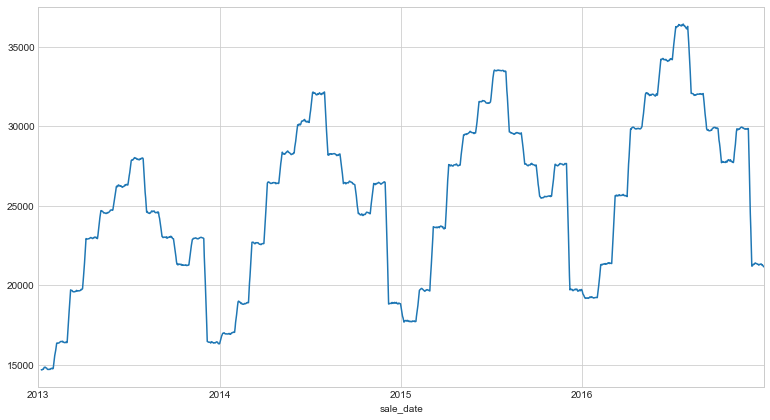

In [36]:
train.rolling(7).mean().plot(figsize=(13, 7))
plt.show()

In [ ]:
# they are basically the same graph

4. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

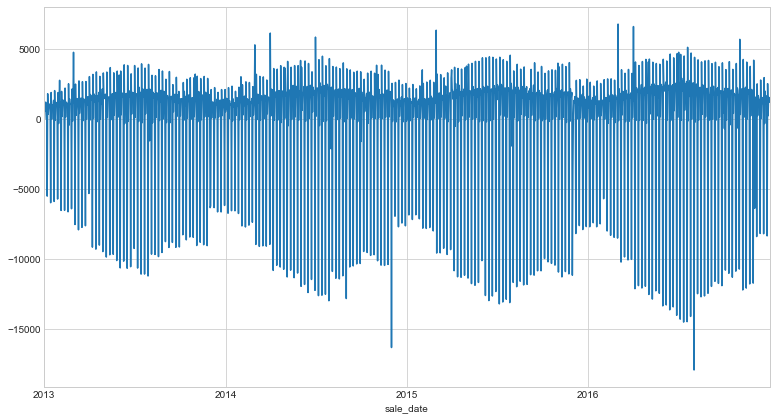

In [37]:
train.resample('D').mean().diff(periods=1).plot(figsize=(13,7))

In [10]:
# There is a drastic difference day over day

5. Plot a time series decomposition.

<Figure size 936x504 with 0 Axes>

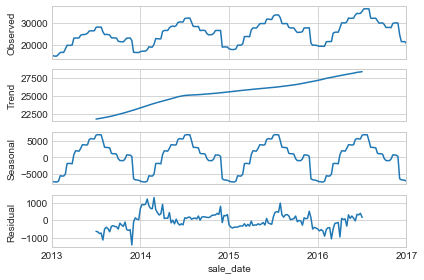

In [43]:
decomposition = sm.tsa.seasonal_decompose(train.resample('W').mean(), model='additive')

fig = decomposition.plot()
plt.show()

6. Create a lag plot (day over day).

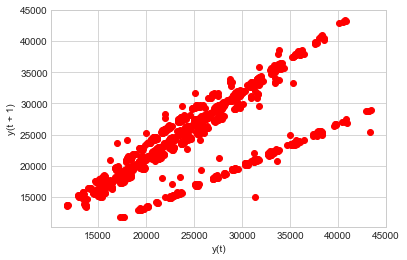

In [52]:
pd.plotting.lag_plot(train.resample('D').mean(), lag=1, c='Red')

7. Run a lag correlation.

In [13]:
df_corr = pd.concat([train.shift(1), train], axis=1)
df_corr.columns = ['t-1','t+1']
result = df_corr.corr()
print(result)

         t-1      t+1
t-1  1.00000  0.74914
t+1  0.74914  1.00000


In [59]:
pd.DataFrame({
    'y': train,
    'y(t + 1)': train.shift(-1),
    'y(t + 2)': train.shift(-2)
}).corr()

,y,y(t + 1),y(t + 2)
y,1.000000,0.749140,0.666715
y(t + 1),0.749140,1.000000,0.748519
y(t + 2),0.666715,0.748519,1.000000


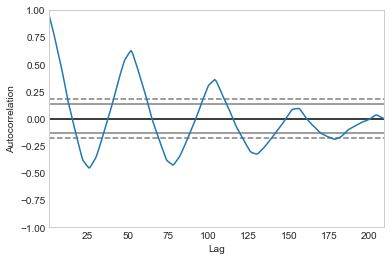

In [60]:
pd.plotting.autocorrelation_plot(train.resample('W').mean())

Using your OPS data you prepped in lesson 2 exercises:

1. Split your data into train and test using the percent cutoff method.

In [14]:
ops = prepare.prep_ops_data()
ops.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind+Solar     2187 non-null float64
month          4383 non-null int64
year           4383 non-null int64
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


In [15]:
ops.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


In [16]:
train_size = int(len(ops) * 0.7)
train1, test1 = ops[0:train_size], ops[train_size:len(ops)]
print('Observations: %d' % (len(ops)))
print('Training Observations: %d' % (len(train1)))
print('Testing Observations: %d' % (len(test1)))

Observations: 4383
Training Observations: 3068
Testing Observations: 1315


In [17]:
train1.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


2. Validate your splits by plotting X_train and y_train.

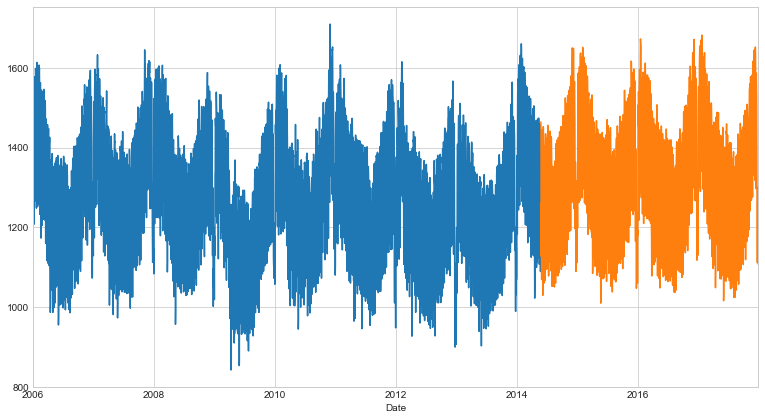

In [34]:
plt.figure(figsize=(13, 7))
train1.Consumption.plot()
test1.Consumption.plot()
plt.show()

3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

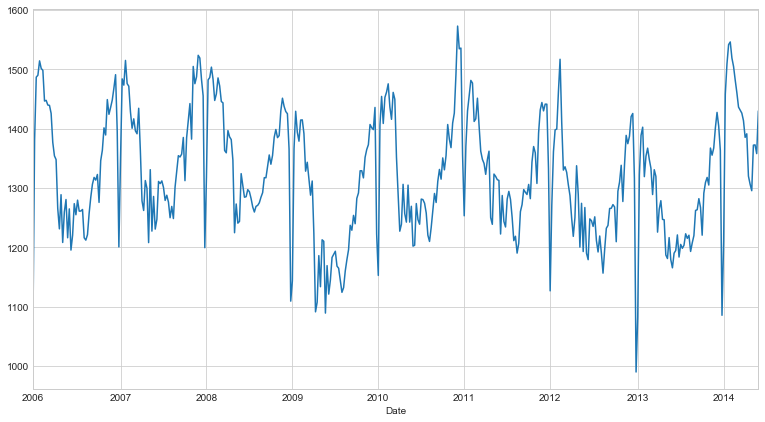

In [32]:
train1.Consumption.resample('W').mean().plot(figsize=(13, 7))
plt.show()

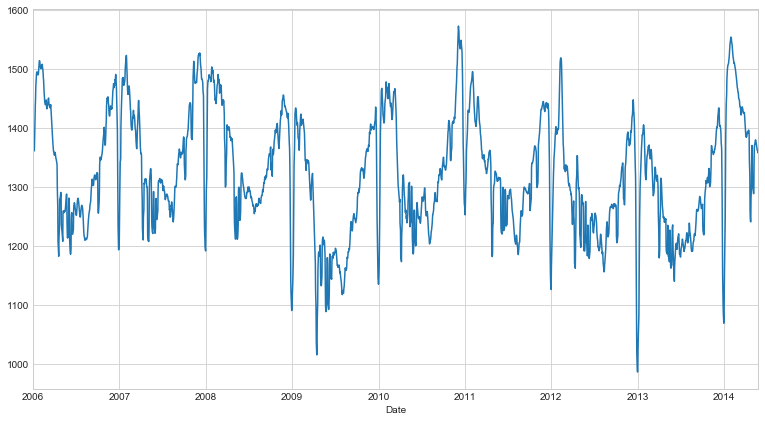

In [33]:
train1.Consumption.rolling(7).mean().plot(figsize=(13, 7))
plt.show()

4. Group the electricity consumption time series by month of year, to explore annual seasonality.

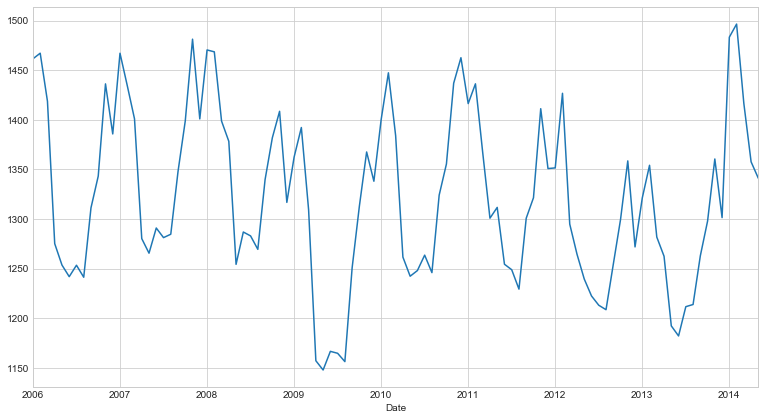

In [39]:
train1.Consumption.resample('M').mean().plot(figsize=(13, 7))
plt.show()

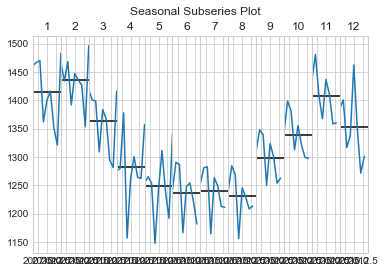

In [58]:
table = train1.groupby([train1.index.year, train1.index.month]).Consumption.mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    
fig.suptitle('Seasonal Subseries Plot') 
fig.subplots_adjust(wspace=0)

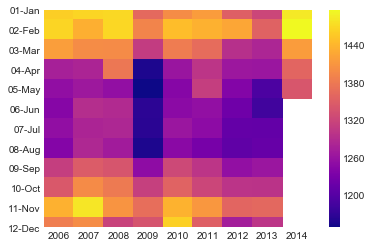

In [63]:
table = train1.groupby([train1.index.strftime('%Y'), train1.index.strftime('%m-%b')]).Consumption.mean().unstack(0)
sns.heatmap(table, cmap='plasma')

5. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

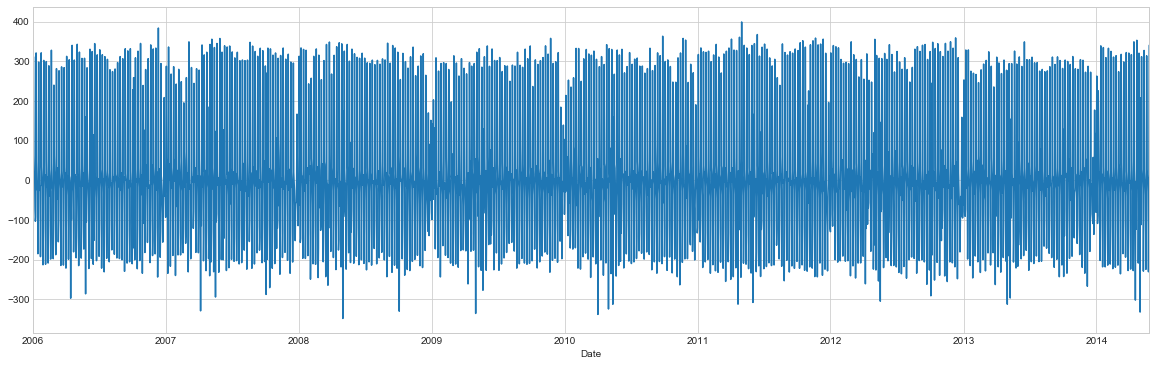

In [23]:
train1.Consumption.resample('D').mean().diff(periods=1).plot(figsize=(20,6))

6. Plot a time series decomposition. Takeaways?

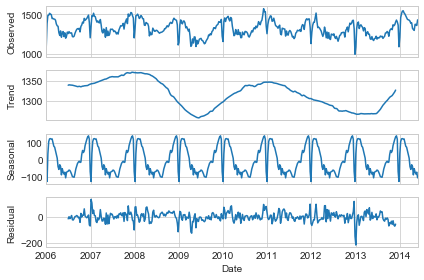

In [24]:
decomposition = sm.tsa.seasonal_decompose(train1.Consumption.resample('W').mean(), model='additive')

fig = decomposition.plot()
plt.show()

In [ ]:
# It looks like they don't use a/c in the sumer, and they shut down the country for christmas. 
# there is also a huge drop in consumption in the year 2009 & 2012 - 2013

For each store I want to see how many items were sold over a period of time, for each item. Find a way to chart this. Hints: Subplots for the piece with the fewest distinct values (like store), x = time, y = count, color = item. If you have too many distinct items, you may need to plot the top n, while aggregating the others into an 'other' bucket.